# Search Reranking Model exploration

### Data Import

### Import from BigQuery

Takes long to import (around 2H)

In [1]:
# import pandas as pd 
# q1 = """ 
# SELECT *
# FROM `brs-service-prod.views.temp_search_data_model`
# """
# df = pd.read_gbq(query=q1, project_id='brs-service-prod', progress_bar_type='tqdm_notebook')

### Import from CSV
Data saved from BigQuery

In [2]:
import pandas as pd
filename = 'bgq_data_search.csv'
total_rows = sum(1 for _ in open(filename, 'r', encoding='utf-8'))

Get the total rows in the data

In [3]:
print(total_rows)

25400870


Load the Data chunkwise

In [4]:
from tqdm import tqdm

chunksize = 1000000
df_list = []
# Count the total number of rows in the file

with tqdm(total=total_rows) as pbar:
    # Initialize the progress bar with the total number of rows
    for chunk in pd.read_csv(filename, chunksize=chunksize):
        # Read the CSV file in chunks
        pbar.update(len(chunk))
        df_list.append(chunk)
        # Update the progress bar with the number of rows read in each chunk

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 25400790/25400870 [02:36<00:00, 162535.46it/s]


Concatenate chunks to form the dataframe

In [5]:
df = pd.concat(df_list, ignore_index=True)

In [6]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,product_tag,sales_velocity_components,pinpoint,...,brand,product_created_date,ctr,ctr_price,a2crclicks,a2crate,atoc_price,product_score,lifetimeorder_count,cvrate
0,samsung a04e,SAC-70168-00022,1155125.0,37,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-02-06 06:46:25.301000+00:00,100.0,1160000.0,6,100.0,1138000.0,45.000000,252.0,0.453772
1,samsung a04e,SAB-26314-00744,1148708.0,4,Silver,False,0.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,NaN,...,Samsung,2022-11-19 17:17:08.405000+00:00,100.0,1129000.0,1,100.0,1154000.0,85.333333,243.0,1.944895
2,samsung watch,SAO-60034-01469,2049000.0,1,Diamond,True,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"0.914883,104.458885",...,Samsung,2021-09-30 14:51:47.181000+00:00,100.0,2299000.0,1,100.0,2196000.0,81.650000,3854.0,0.000000
3,samsung,GAI-60039-01874,1508000.0,8,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.746266099999999,110.3353264",...,Samsung,2023-01-12 13:52:43.676000+00:00,0.0,NaN,1,100.0,1508000.0,81.666667,296.0,0.000000
4,samsung a54,SAB-60079-00212,6399000.0,20,Diamond,True,5.0,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-03-21 20:17:06.237000+00:00,0.0,NaN,1,100.0,6399000.0,65.430000,61.0,0.000000


Check for null values in the dataframe

In [7]:
print(f"data has {df.isnull().values.sum()} null values:")

data has 50899694 null values:


In [8]:
def get_df_info(df):
    print("df columns: \n",df.columns)
    print(f"df shape: \n",df.shape)
    print(f"df data types: \n",df.dtypes)
    return df.head(10)

In [9]:
get_df_info(df)

df columns: 
 Index(['search_internal_keyword', 'product_id', 'price', 'position',
       'seller_badge', 'official_store', 'product_rating', 'product_tag',
       'sales_velocity_components', 'pinpoint', 'search_result_score', 'brand',
       'product_created_date', 'ctr', 'ctr_price', 'a2crclicks', 'a2crate',
       'atoc_price', 'product_score', 'lifetimeorder_count', 'cvrate'],
      dtype='object')
df shape: 
 (25400790, 21)
df data types: 
 search_internal_keyword       object
product_id                    object
price                        float64
position                       int64
seller_badge                  object
official_store                object
product_rating               float64
product_tag                   object
sales_velocity_components     object
pinpoint                      object
search_result_score          float64
brand                         object
product_created_date          object
ctr                          float64
ctr_price                    fl

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,product_tag,sales_velocity_components,pinpoint,...,brand,product_created_date,ctr,ctr_price,a2crclicks,a2crate,atoc_price,product_score,lifetimeorder_count,cvrate
0,samsung a04e,SAC-70168-00022,1155125.0,37,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-02-06 06:46:25.301000+00:00,100.0,1160000.0,6,100.0,1138000.0,45.000000,252.0,0.453772
1,samsung a04e,SAB-26314-00744,1148708.0,4,Silver,False,0.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,NaN,...,Samsung,2022-11-19 17:17:08.405000+00:00,100.0,1129000.0,1,100.0,1154000.0,85.333333,243.0,1.944895
2,samsung watch,SAO-60034-01469,2049000.0,1,Diamond,True,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"0.914883,104.458885",...,Samsung,2021-09-30 14:51:47.181000+00:00,100.0,2299000.0,1,100.0,2196000.0,81.650000,3854.0,0.000000
3,samsung,GAI-60039-01874,1508000.0,8,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.746266099999999,110.3353264",...,Samsung,2023-01-12 13:52:43.676000+00:00,0.0,NaN,1,100.0,1508000.0,81.666667,296.0,0.000000
4,samsung a54,SAB-60079-00212,6399000.0,20,Diamond,True,5.0,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-03-21 20:17:06.237000+00:00,0.0,NaN,1,100.0,6399000.0,65.430000,61.0,0.000000
5,samsung,SAO-60034-01630,3899000.0,26,Diamond,True,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.436773698723306,112.44384694844484",...,Samsung,2022-01-12 16:59:16.533000+00:00,100.0,3989000.0,1,100.0,3909000.0,82.000000,888.0,0.000000
6,samsung,INL-60035-01063,2409000.0,31,Diamond,True,NaN,NaN,q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,NaN,...,Samsung,2022-11-16 16:09:22.803000+00:00,100.0,2409000.0,1,100.0,2389000.0,83.050000,2227.0,0.000000
7,samsung a33,SAB-70262-00008,4299000.0,51,Bronze,False,5.0,"[ZERO_PERCENT_INSTALLMENT, BOPIS]",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"-7.667417899999999,110.6671408",...,Samsung,2022-10-07 11:26:38.365000+00:00,100.0,4290000.0,1,100.0,4299000.0,36.900000,46.0,0.000000
8,samsung a04e,RAJ-60024-00080,1155000.0,145,Diamond,False,NaN,NaN,NaN,"-6.1666273017157955,106.79941029999999",...,Samsung,2023-02-03 14:20:17.750000+00:00,100.0,1155000.0,4,100.0,1155000.0,84.000000,196.0,0.805952
9,samsung a04e,UTS-60025-00042,1150000.0,58,Diamond,False,0.0,"[PRISTINE, ZERO_PERCENT_INSTALLMENT, REGULAR]",q7EaLOO+LTu3h7XD2OPhHxP2axnmwSt0Cd6IX3dOsDRpUU...,"-6.4007033,107.445355",...,Samsung,2023-02-25 00:11:52.982000+00:00,100.0,1157500.0,0,0.0,NaN,54.000000,144.0,0.000000


In [10]:
df.nunique()

search_internal_keyword       20958
product_id                   202542
price                         26680
position                        800
seller_badge                      8
official_store                    2
product_rating                   31
product_tag                    1364
sales_velocity_components     24932
pinpoint                      35693
search_result_score            3975
brand                          1402
product_created_date         195450
ctr                               2
ctr_price                      8580
a2crclicks                       35
a2crate                           2
atoc_price                     2234
product_score                  2928
lifetimeorder_count             593
cvrate                          522
dtype: int64

In [11]:
print("there are in total {} products ".format(len(df.product_id.unique())))
print("there are in total {} search query ".format(len(df.search_internal_keyword.unique())))

there are in total 202542 products 
there are in total 20958 search query 


In [12]:
# # Generate a histogram for the count of digits in the "search_internal_keyword" column
# (df.search_internal_keyword.str.count('\d+') + 1).hist(bins=30)

# # Generate a histogram for the count of non-word characters in the "search_internal_keyword" column
# (df.search_internal_keyword.str.count('\W') + 1).hist(bins=30)

In [13]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,product_tag,sales_velocity_components,pinpoint,...,brand,product_created_date,ctr,ctr_price,a2crclicks,a2crate,atoc_price,product_score,lifetimeorder_count,cvrate
0,samsung a04e,SAC-70168-00022,1155125.0,37,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-02-06 06:46:25.301000+00:00,100.0,1160000.0,6,100.0,1138000.0,45.000000,252.0,0.453772
1,samsung a04e,SAB-26314-00744,1148708.0,4,Silver,False,0.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,NaN,...,Samsung,2022-11-19 17:17:08.405000+00:00,100.0,1129000.0,1,100.0,1154000.0,85.333333,243.0,1.944895
2,samsung watch,SAO-60034-01469,2049000.0,1,Diamond,True,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"0.914883,104.458885",...,Samsung,2021-09-30 14:51:47.181000+00:00,100.0,2299000.0,1,100.0,2196000.0,81.650000,3854.0,0.000000
3,samsung,GAI-60039-01874,1508000.0,8,Gold,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.746266099999999,110.3353264",...,Samsung,2023-01-12 13:52:43.676000+00:00,0.0,NaN,1,100.0,1508000.0,81.666667,296.0,0.000000
4,samsung a54,SAB-60079-00212,6399000.0,20,Diamond,True,5.0,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-03-21 20:17:06.237000+00:00,0.0,NaN,1,100.0,6399000.0,65.430000,61.0,0.000000


In [14]:
# Get all categorical variables
categorical_features = df.select_dtypes(include='object')

# Print the categorical features
categorical_features

,search_internal_keyword,product_id,seller_badge,official_store,product_tag,sales_velocity_components,pinpoint,brand,product_created_date
0,samsung a04e,SAC-70168-00022,Gold,True,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,Samsung,2023-02-06 06:46:25.301000+00:00
1,samsung a04e,SAB-26314-00744,Silver,False,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,NaN,Samsung,2022-11-19 17:17:08.405000+00:00
2,samsung watch,SAO-60034-01469,Diamond,True,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"0.914883,104.458885",Samsung,2021-09-30 14:51:47.181000+00:00
3,samsung,GAI-60039-01874,Gold,True,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.746266099999999,110.3353264",Samsung,2023-01-12 13:52:43.676000+00:00
4,samsung a54,SAB-60079-00212,Diamond,True,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,Samsung,2023-03-21 20:17:06.237000+00:00
...,...,...,...,...,...,...,...,...,...
25400785,samsung a13,INL-60035-01062,Diamond,True,FLASH_SALE_CAMPAIGN,NaN,"-6.223386400969793,106.82579487562181",Samsung,2022-11-16 16:08:19.391000+00:00
25400786,samsung a13,SAO-60034-01684,diamond,True,BLIKLAN,q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"-6.9885218,110.4045562",Samsung,2022-03-18 16:52:14.954000+00:00
25400787,samsung a13,INL-60035-01062,Diamond,True,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"-6.139876743087969,106.71410836279394",Samsung,2022-11-16 16:08:19.391000+00:00
25400788,samsung a13 4/128,INL-60035-01062,Diamond,True,FLASH_SALE_CAMPAIGN,q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"-6.1666273017157955,106.79940974999998",Samsung,2022-11-16 16:08:19.391000+00:00


In [15]:
# # Get all unique tags
# unique_tags = df['product_tag'].unique()

# # Print the unique tags
# print(unique_tags)

In [16]:
df['seller_badge'].unique()

array(['Gold', 'Silver', 'Diamond', 'Bronze', 'diamond', nan, 'gold',
       'silver', 'bronze'], dtype=object)

In [17]:
# Create a dictionary to map each lowercase category to its corresponding numeric value
category_mapping = {
    'gold': 3,
    'silver': 2,
    'diamond': 4,
    'bronze': 1
}

# Convert the seller_badge values to lowercase and replace them with their corresponding numeric values
df['seller_badge'] = df['seller_badge'].str.lower().map(category_mapping)

# updated column
df['seller_badge'].unique()

array([ 3.,  2.,  4.,  1., nan])

In [18]:
# # Convert NaN values to 'None' in the 'seller_badge' column
# df['seller_badge'].fillna('None', inplace=True)

# # Create a list of unique seller badges (ignoring case) excluding 'None'
# seller_badges = df['seller_badge'].str.lower().unique()
# seller_badges = [badge for badge in seller_badges if badge != 'none']

# # Drop the original 'seller_badge' column
# # df.drop('seller_badge', axis=1, inplace=True)

# # Convert columns to strings
# df = df.astype(str)

# # Create separate columns for each unique seller badge
# for badge in seller_badges:
#     column_name = 'seller_badge_' + badge
#     df[column_name] = (df[column_name].str.lower() == badge).astype(int)

# # Fill all columns with 'None' as 0
# df.loc[df[seller_badges].isna().all(axis=1), seller_badges] = 0


In [19]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,product_tag,sales_velocity_components,pinpoint,...,brand,product_created_date,ctr,ctr_price,a2crclicks,a2crate,atoc_price,product_score,lifetimeorder_count,cvrate
0,samsung a04e,SAC-70168-00022,1155125.0,37,3.0,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-02-06 06:46:25.301000+00:00,100.0,1160000.0,6,100.0,1138000.0,45.000000,252.0,0.453772
1,samsung a04e,SAB-26314-00744,1148708.0,4,2.0,False,0.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,NaN,...,Samsung,2022-11-19 17:17:08.405000+00:00,100.0,1129000.0,1,100.0,1154000.0,85.333333,243.0,1.944895
2,samsung watch,SAO-60034-01469,2049000.0,1,4.0,True,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,"0.914883,104.458885",...,Samsung,2021-09-30 14:51:47.181000+00:00,100.0,2299000.0,1,100.0,2196000.0,81.650000,3854.0,0.000000
3,samsung,GAI-60039-01874,1508000.0,8,3.0,True,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,"-7.746266099999999,110.3353264",...,Samsung,2023-01-12 13:52:43.676000+00:00,0.0,NaN,1,100.0,1508000.0,81.666667,296.0,0.000000
4,samsung a54,SAB-60079-00212,6399000.0,20,4.0,True,5.0,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,Samsung,2023-03-21 20:17:06.237000+00:00,0.0,NaN,1,100.0,6399000.0,65.430000,61.0,0.000000


In [20]:
df['official_store'].unique()

array([True, False, nan], dtype=object)

In [21]:
# Convert the official_store column to boolean type
df['official_store'] = df['official_store'].astype(bool)

In [22]:
# Convert the official_store column to boolean type
df['official_store'] = df['official_store'].astype(int)

In [23]:
df['official_store'].unique()

array([1, 0])

In [24]:
# normalising lifetimeorder_count column
lifetimeorder_count_min = df['lifetimeorder_count'].min()

In [25]:
lifetimeorder_count_min

1.0

In [26]:
lifetimeorder_count_max = df['lifetimeorder_count'].max()
lifetimeorder_count_max

24822.0

In [27]:
# Perform min-max normalization on the life time order count
df['normalized_lifetimeorder_count'] = (df['lifetimeorder_count'] - lifetimeorder_count_min) / (lifetimeorder_count_max - lifetimeorder_count_min)

In [28]:
product_score_max = df['product_score'].max()
product_score_max

127.14

In [29]:
product_score_min = df['product_score'].min()
product_score_min

11.25

In [30]:
# Perform min-max normalization on the life time order count
df['normalized_product_score'] = (df['product_score'] - product_score_min) / (product_score_max - product_score_min)

In [31]:
cvrate_max = df['cvrate'].max()
cvrate_max

200.0

In [32]:
cvrate_min = df['cvrate'].min()
cvrate_min

0.0

In [33]:
# Perform min-max normalization on the cvr
df['normalized_cvr'] = (df['cvrate'] - cvrate_min) / (cvrate_max - cvrate_min)

In [34]:
a2crate_max = df['a2crate'].max()
a2crate_max

100.0

In [35]:
a2crate_min = df['a2crate'].min()
a2crate_min

0.0

In [36]:
# Perform min-max normalization on the cvr
df['normalized_a2crate'] = (df['cvrate'] - a2crate_min) / (a2crate_max - a2crate_min)

In [37]:
ctr_max = df['ctr'].max()
ctr_max

100.0

In [38]:
ctr_min = df['ctr'].min()
ctr_min

0.0

In [39]:
# Perform min-max normalization on the cvr
df['normalized_ctr'] = (df['ctr'] - ctr_min) / (ctr_max - ctr_min)

In [40]:
search_result_score_min = df['search_result_score'].min()
search_result_score_min

0.0

In [41]:
search_result_score_max = df['search_result_score'].max()
search_result_score_max

0.4900730864025502

In [42]:
# Perform min-max normalization on the cvr
df['normalized_search_result_score'] = (df['search_result_score'] - search_result_score_min) / (search_result_score_max - search_result_score_min)

In [43]:
# unique_keywords = df['search_internal_keyword'].unique()

# # Print the unique values
# for value in unique_keywords:
#     print(value)

In [44]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import vstack

# def generate_text_embedding_tfidf(df, column_name, batch_size=1000):
#     vectorizer = TfidfVectorizer()
#     num_rows = df.shape[0]
#     num_batches = (num_rows // batch_size) + 1

#     embeddings = []
#     progress_bar = tqdm(total=num_batches, desc='Processing')
#     for i in range(num_batches):
#         start_idx = i * batch_size
#         end_idx = min((i + 1) * batch_size, num_rows)
#         batch_embeddings = vectorizer.fit_transform(df.iloc[start_idx:end_idx][column_name])
#         embeddings.append(batch_embeddings)
#         progress_bar.update(1)

#     progress_bar.close()

#     embeddings = vstack(embeddings)
#     df['embedding_column'] = pd.Series(embeddings.toarray().tolist())
#     return df


In [45]:
#df = generate_text_embedding_tfidf(df, 'search_internal_keyword')

In [46]:
#remove pinpoint, not needed
df.drop('pinpoint', axis=1)

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,product_tag,sales_velocity_components,search_result_score,...,atoc_price,product_score,lifetimeorder_count,cvrate,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score
0,samsung a04e,SAC-70168-00022,1155125.0,37,3.0,1,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, MERCHANT_V...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,1138000.0,45.000000,252.0,0.453772,0.010112,0.291224,0.002269,0.004538,1.0,NaN
1,samsung a04e,SAB-26314-00744,1148708.0,4,2.0,0,0.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR]",NaN,0.073283,...,1154000.0,85.333333,243.0,1.944895,0.009750,0.639256,0.009724,0.019449,1.0,0.149535
2,samsung watch,SAO-60034-01469,2049000.0,1,4.0,1,4.9,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,0.050883,...,2196000.0,81.650000,3854.0,0.000000,0.155231,0.607473,0.000000,0.000000,1.0,0.103827
3,samsung,GAI-60039-01874,1508000.0,8,3.0,1,5.0,"[ZERO_PERCENT_INSTALLMENT, REGULAR, FLASH_SALE...",q7EaLOO+LTu3h7XD2OPhHzz7n51gcTfO9KAoDwJmlUFpUU...,0.073251,...,1508000.0,81.666667,296.0,0.000000,0.011885,0.607616,0.000000,0.000000,0.0,0.149470
4,samsung a54,SAB-60079-00212,6399000.0,20,4.0,1,5.0,"[NEW, ZERO_PERCENT_INSTALLMENT, CNC_AVAILABLE,...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,0.013731,...,6399000.0,65.430000,61.0,0.000000,0.002417,0.467512,0.000000,0.000000,0.0,0.028018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400785,samsung a13,INL-60035-01062,2127000.0,5,4.0,1,NaN,FLASH_SALE_CAMPAIGN,NaN,NaN,...,NaN,83.050000,1981.0,5.644769,0.079771,0.619553,0.028224,0.056448,1.0,NaN
25400786,samsung a13,SAO-60034-01684,2449000.0,19,4.0,1,NaN,BLIKLAN,q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,2449000.0,83.050000,1981.0,0.067114,0.079771,0.619553,0.000336,0.000671,1.0,NaN
25400787,samsung a13,INL-60035-01062,2189000.0,7,4.0,1,4.8,"[ZERO_PERCENT_INSTALLMENT, REGULAR, BLIBLI_SHI...",q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,2167000.0,83.050000,1981.0,5.644769,0.079771,0.619553,0.028224,0.056448,1.0,NaN
25400788,samsung a13 4/128,INL-60035-01062,2157000.0,3,4.0,1,NaN,FLASH_SALE_CAMPAIGN,q7EaLOO+LTu3h7XD2OPhH0MfU1/rl59YzFNQXvCvT/Pd7K...,NaN,...,2157000.0,83.050000,1981.0,33.531157,0.079771,0.619553,0.167656,0.335312,1.0,NaN


In [47]:
atoc_price_min = df['atoc_price'].min()
atoc_price_min

9.0

In [48]:
price_max = df['price'].max()
price_max

99999999999999.02

In [49]:
price_min = df['price'].min()
price_min

0.0

In [50]:
ctr_price_min = df['ctr_price'].min()
ctr_price_min

1.0

In [51]:
ctr_price_max = df['ctr_price'].max()
ctr_price_max

9999999999.0

Should the log transformation be the right thing for each of these prices we have?
I guess yet, but the other transformation jo main kar sakta hun can be, z score normalization???? Maybe, how?

z = (x - mean) / standard_deviation

Or, Min-Max scaling?---> Alone min max? maybe no, it will compress it so much.

Maybe min-max and then the log

In [52]:
import numpy as np
# Apply a combination of transformations: Min-Max Scaling followed by Log Transformation
# Min-Max Scaling
min_val = df['price'].min()
max_val = df['price'].max()
df['price_scaled'] = (df['price'] - min_val) / (max_val - min_val)

# Log Transformation
df['price_scaled_log'] = np.log(df['price'] + 1)

In [53]:
df.drop(['pinpoint', 'sales_velocity_components', 'product_tag'], axis=1, inplace=True)

In [54]:
# Data type of the 'product_created_date' column
column_type = df['product_created_date'].dtype
print("Data type of 'product_created_date' column:", column_type)

# Retrieve one value from the first row of the 'product_created_date' column
value = df.at[0, 'product_created_date']
print("Value from the first row of 'product_created_date' column:", value)


Data type of 'product_created_date' column: object
Value from the first row of 'product_created_date' column: 2023-02-06 06:46:25.301000+00:00


In [55]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,search_result_score,brand,product_created_date,...,lifetimeorder_count,cvrate,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,price_scaled,price_scaled_log
0,samsung a04e,SAC-70168-00022,1155125.0,37,3.0,1,5.0,NaN,Samsung,2023-02-06 06:46:25.301000+00:00,...,252.0,0.453772,0.010112,0.291224,0.002269,0.004538,1.0,NaN,1.155125e-08,13.959720
1,samsung a04e,SAB-26314-00744,1148708.0,4,2.0,0,0.0,0.073283,Samsung,2022-11-19 17:17:08.405000+00:00,...,243.0,1.944895,0.009750,0.639256,0.009724,0.019449,1.0,0.149535,1.148708e-08,13.954149
2,samsung watch,SAO-60034-01469,2049000.0,1,4.0,1,4.9,0.050883,Samsung,2021-09-30 14:51:47.181000+00:00,...,3854.0,0.000000,0.155231,0.607473,0.000000,0.000000,1.0,0.103827,2.049000e-08,14.532863
3,samsung,GAI-60039-01874,1508000.0,8,3.0,1,5.0,0.073251,Samsung,2023-01-12 13:52:43.676000+00:00,...,296.0,0.000000,0.011885,0.607616,0.000000,0.000000,0.0,0.149470,1.508000e-08,14.226295
4,samsung a54,SAB-60079-00212,6399000.0,20,4.0,1,5.0,0.013731,Samsung,2023-03-21 20:17:06.237000+00:00,...,61.0,0.000000,0.002417,0.467512,0.000000,0.000000,0.0,0.028018,6.399000e-08,15.671652


In [56]:
import datetime
import pytz

df['product_created_date'] = pd.to_datetime(df['product_created_date'], errors='coerce')

# Calculate product age in days based on the current day
current_day = datetime.datetime.now(pytz.utc)
current_day = current_day.astimezone(pytz.timezone('utc'))

df['product_age'] = (current_day - df['product_created_date']).dt.days

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['product_age_normalized'] = scaler.fit_transform(df[['product_age']])

In [57]:
from sklearn.preprocessing import StandardScaler


# Create an instance of the StandardScaler
scaler = StandardScaler()

# Standardize the 'product_age' column
df['product_age_standardized'] = scaler.fit_transform(df[['product_age']])


In [58]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,search_result_score,brand,product_created_date,...,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,price_scaled,price_scaled_log,product_age,product_age_normalized,product_age_standardized
0,samsung a04e,SAC-70168-00022,1155125.0,37,3.0,1,5.0,NaN,Samsung,2023-02-06 06:46:25.301000+00:00,...,0.291224,0.002269,0.004538,1.0,NaN,1.155125e-08,13.959720,120.0,0.028377,-0.622868
1,samsung a04e,SAB-26314-00744,1148708.0,4,2.0,0,0.0,0.073283,Samsung,2022-11-19 17:17:08.405000+00:00,...,0.639256,0.009724,0.019449,1.0,0.149535,1.148708e-08,13.954149,198.0,0.059552,-0.285383
2,samsung watch,SAO-60034-01469,2049000.0,1,4.0,1,4.9,0.050883,Samsung,2021-09-30 14:51:47.181000+00:00,...,0.607473,0.000000,0.000000,1.0,0.103827,2.049000e-08,14.532863,614.0,0.225819,1.514539
3,samsung,GAI-60039-01874,1508000.0,8,3.0,1,5.0,0.073251,Samsung,2023-01-12 13:52:43.676000+00:00,...,0.607616,0.000000,0.000000,0.0,0.149470,1.508000e-08,14.226295,145.0,0.038369,-0.514700
4,samsung a54,SAB-60079-00212,6399000.0,20,4.0,1,5.0,0.013731,Samsung,2023-03-21 20:17:06.237000+00:00,...,0.467512,0.000000,0.000000,0.0,0.028018,6.399000e-08,15.671652,76.0,0.010791,-0.813244


In [59]:
scaler = StandardScaler()

# Reshape the price data to a 2-dimensional array as required by the StandardScaler
price_data = df['price'].values.reshape(-1, 1)

# Fit the scaler to the price data and transform it
df['price_standardized'] = scaler.fit_transform(price_data)

In [60]:
scaler = StandardScaler()

# Reshape the price data to a 2-dimensional array as required by the StandardScaler
ctr_price_data = df['ctr_price'].values.reshape(-1, 1)

# Fit the scaler to the price data and transform it
df['ctr_price_standardized'] = scaler.fit_transform(ctr_price_data)

In [61]:
scaler = StandardScaler()

# Reshape the price data to a 2-dimensional array as required by the StandardScaler
atoc_price_data = df['atoc_price'].values.reshape(-1, 1)

# Fit the scaler to the price data and transform it
df['atoc_price_standardized'] = scaler.fit_transform(atoc_price_data)

In [62]:
price_standardized_min = df['price_standardized'].min()
price_standardized_min

price_standardized_max = df['price_standardized'].max()
price_standardized_max

print(f'price_standardized max: \n', price_standardized_max)
print(f'price_standardized min: \n', price_standardized_min)

price_standardized max: 
 1734.4742013402486
price_standardized min: 
 -0.0008422394289632865


In [63]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Histogram
# sns.histplot(data=df, x='price_standardized')  # or x='price_standardized'
# plt.title('Histogram of price_standardized')  # or 'Histogram of Standardized Prices'
# plt.show()

# # Box Plot
# sns.boxplot(data=df, x='price_standardized')  # or x='price_standardized'
# plt.title('Box Plot of price_standardized')  # or 'Box Plot of Standardized Prices'
# plt.show()

# # Density Plot
# sns.kdeplot(data=df, x='price_standardized')  # or x='price_standardized'
# plt.title('Density Plot of price_standardized')  # or 'Density Plot of Standardized Prices'
# plt.show()

# # QQ Plot
# stats.probplot(df['price_standardized'], dist='norm', plot=plt)  # or 'price_standardized'
# plt.title('QQ Plot of price_standardized')  # or 'QQ Plot of Standardized Prices'
# plt.show()

In [64]:
price_scaled_log_min = df['price_scaled_log'].min()
price_scaled_log_min

price_scaled_log_max = df['price_scaled_log'].max()
price_scaled_log_max

print(f'price_scaled_log max: \n', price_scaled_log_max)
print(f'price_scaled_log min: \n', price_scaled_log_min)

price_scaled_log max: 
 32.23619130191664
price_scaled_log min: 
 0.0


In [65]:
#target = (ctr * ctr_weight + min(position, 40) * position_weight) / (ctr_weight + position_weight)

import numpy as np
def calculate_target(df, ctr_weight, position_weight):
    # Apply the weighted average formula to create the target variable
    df['target'] = np.where(df['normalized_ctr'].notnull() & df['position'].notnull(),
                            (df['normalized_ctr'] * ctr_weight + np.minimum(df['position'], 40) * position_weight) /
                            (ctr_weight + position_weight),
                            np.nan)
    return df

In [66]:
df = calculate_target(df, ctr_weight=0.7, position_weight=0.3)

In [67]:
df.head()

,search_internal_keyword,product_id,price,position,seller_badge,official_store,product_rating,search_result_score,brand,product_created_date,...,normalized_search_result_score,price_scaled,price_scaled_log,product_age,product_age_normalized,product_age_standardized,price_standardized,ctr_price_standardized,atoc_price_standardized,target
0,samsung a04e,SAC-70168-00022,1155125.0,37,3.0,1,5.0,NaN,Samsung,2023-02-06 06:46:25.301000+00:00,...,NaN,1.155125e-08,13.959720,120.0,0.028377,-0.622868,-0.000822,-0.097427,-0.787503,11.8
1,samsung a04e,SAB-26314-00744,1148708.0,4,2.0,0,0.0,0.073283,Samsung,2022-11-19 17:17:08.405000+00:00,...,0.149535,1.148708e-08,13.954149,198.0,0.059552,-0.285383,-0.000822,-0.098226,-0.783641,1.9
2,samsung watch,SAO-60034-01469,2049000.0,1,4.0,1,4.9,0.050883,Samsung,2021-09-30 14:51:47.181000+00:00,...,0.103827,2.049000e-08,14.532863,614.0,0.225819,1.514539,-0.000807,-0.068066,-0.532136,1.0
3,samsung,GAI-60039-01874,1508000.0,8,3.0,1,5.0,0.073251,Samsung,2023-01-12 13:52:43.676000+00:00,...,0.149470,1.508000e-08,14.226295,145.0,0.038369,-0.514700,-0.000816,NaN,-0.698197,2.4
4,samsung a54,SAB-60079-00212,6399000.0,20,4.0,1,5.0,0.013731,Samsung,2023-03-21 20:17:06.237000+00:00,...,0.028018,6.399000e-08,15.671652,76.0,0.010791,-0.813244,-0.000731,NaN,0.482334,6.0


In [68]:
# Get all the numeric variables
numeric_columns= df.select_dtypes(include= [np.number]).columns
numeric_columns

Index(['price', 'position', 'seller_badge', 'official_store', 'product_rating',
       'search_result_score', 'ctr', 'ctr_price', 'a2crclicks', 'a2crate',
       'atoc_price', 'product_score', 'lifetimeorder_count', 'cvrate',
       'normalized_lifetimeorder_count', 'normalized_product_score',
       'normalized_cvr', 'normalized_a2crate', 'normalized_ctr',
       'normalized_search_result_score', 'price_scaled', 'price_scaled_log',
       'product_age', 'product_age_normalized', 'product_age_standardized',
       'price_standardized', 'ctr_price_standardized',
       'atoc_price_standardized', 'target'],
      dtype='object')

Set the final df

In [69]:
selected_features = ['position', 'seller_badge', 'official_store', 'product_rating', 'a2crclicks',
       'normalized_lifetimeorder_count', 'normalized_product_score',
       'normalized_cvr', 'normalized_a2crate', 'normalized_ctr',
       'normalized_search_result_score', 'product_age_normalized', 'product_age_standardized',
       'price_standardized', 'target', 'ctr_price_standardized',
       'atoc_price_standardized']
numeric_df = df[selected_features].copy()

In [70]:
df.describe()

,price,position,seller_badge,official_store,product_rating,search_result_score,ctr,ctr_price,a2crclicks,a2crate,...,normalized_search_result_score,price_scaled,price_scaled_log,product_age,product_age_normalized,product_age_standardized,price_standardized,ctr_price_standardized,atoc_price_standardized,target
count,2.523022e+07,2.540079e+07,2.381268e+07,2.540079e+07,2.119368e+07,1.984233e+07,2.540079e+07,1.650090e+07,2.540079e+07,2.540079e+07,...,1.984233e+07,2.523022e+07,2.523022e+07,2.466023e+07,2.466023e+07,2.466023e+07,2.523022e+07,1.650090e+07,1.200646e+07,2.540079e+07
mean,4.855875e+07,2.320359e+01,3.535509e+00,6.522437e-01,3.246553e+00,4.008676e-02,6.496215e+01,4.939455e+06,1.589399e+00,4.726807e+01,...,8.179751e-02,4.855875e-07,1.490464e+01,2.639580e+02,8.591446e-02,-3.821797e-17,1.658411e-19,6.376451e-18,6.249411e-19,5.627408e+00
std,5.765433e+10,3.447087e+01,8.528380e-01,4.762582e-01,2.327606e+00,3.025233e-02,4.770885e+01,3.879272e+07,3.916251e+00,4.992531e+01,...,6.173024e-02,5.765433e-04,1.180729e+00,2.311212e+02,9.237456e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.759829e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,0.000000e+00,-9.300662e-01,-8.422394e-04,-1.273294e-01,-1.062178e+00,3.000000e-01
25%,1.699000e+06,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.373093e-02,0.000000e+00,1.814900e+06,0.000000e+00,0.000000e+00,...,2.801814e-02,1.699000e-08,1.434555e+01,9.600000e+01,1.878497e-02,-7.267097e-01,-8.127707e-04,-8.054487e-02,-6.520958e-01,2.400000e+00
50%,2.900000e+06,1.500000e+01,4.000000e+00,1.000000e+00,4.900000e+00,1.629028e-02,1.000000e+02,2.889000e+06,0.000000e+00,0.000000e+00,...,3.324051e-02,2.900000e-08,1.488022e+01,1.970000e+02,5.915268e-02,-2.897094e-01,-7.919397e-04,-5.285669e-02,-3.803153e-01,4.800000e+00
75%,6.025000e+06,2.600000e+01,4.000000e+00,1.000000e+00,5.000000e+00,7.328677e-02,1.000000e+02,5.999000e+06,2.000000e+00,1.000000e+02,...,1.495425e-01,6.025000e-08,1.561143e+01,3.780000e+02,1.314948e-01,4.934296e-01,-7.377373e-04,2.731299e-02,3.684086e-01,8.200000e+00
max,1.000000e+14,8.000000e+02,4.000000e+00,1.000000e+00,5.000000e+00,4.900731e-01,1.000000e+02,1.000000e+10,7.500000e+01,1.000000e+02,...,1.000000e+00,1.000000e+00,3.223619e+01,2.551000e+03,1.000000e+00,9.895425e+00,1.734474e+03,2.576530e+02,6.419990e+00,1.270000e+01


In [71]:
numeric_df.head()

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,target,ctr_price_standardized,atoc_price_standardized
0,37,3.0,1,5.0,6,0.010112,0.291224,0.002269,0.004538,1.0,NaN,0.028377,-0.622868,-0.000822,11.8,-0.097427,-0.787503
1,4,2.0,0,0.0,1,0.009750,0.639256,0.009724,0.019449,1.0,0.149535,0.059552,-0.285383,-0.000822,1.9,-0.098226,-0.783641
2,1,4.0,1,4.9,1,0.155231,0.607473,0.000000,0.000000,1.0,0.103827,0.225819,1.514539,-0.000807,1.0,-0.068066,-0.532136
3,8,3.0,1,5.0,1,0.011885,0.607616,0.000000,0.000000,0.0,0.149470,0.038369,-0.514700,-0.000816,2.4,NaN,-0.698197
4,20,4.0,1,5.0,1,0.002417,0.467512,0.000000,0.000000,0.0,0.028018,0.010791,-0.813244,-0.000731,6.0,NaN,0.482334


/var/folders/y0/c1t2yllx30dbyz9hkljn_qp40000gn/T/ipykernel_93761/2616313459.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_df.skew(), color="blue", axlabel= "Skewness")


<Axes: xlabel='Skewness', ylabel='Density'>

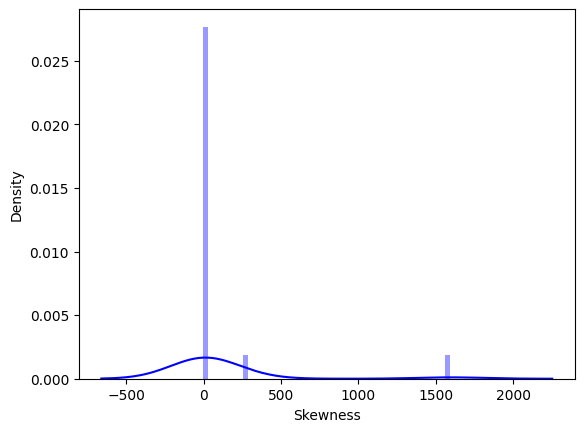

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Skewness plot
sns.distplot(numeric_df.skew(), color="blue", axlabel= "Skewness")

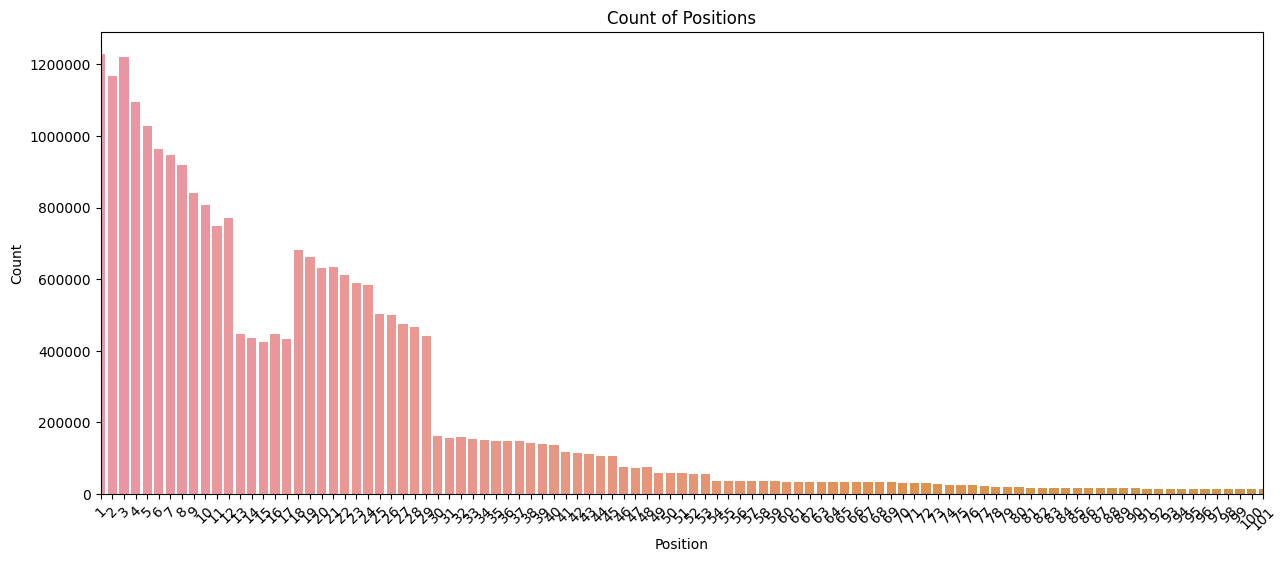

In [73]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as per your preference

sns.countplot(data=numeric_df, x='position')

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.xlabel('Position')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.title('Count of Positions')  # Set plot title
plt.xlim(0, 100)  # Set the x-axis limit to 0 and 100

plt.ticklabel_format(style='plain', axis='y')  # Format y-axis tick labels as plain decimal numbers
plt.show()

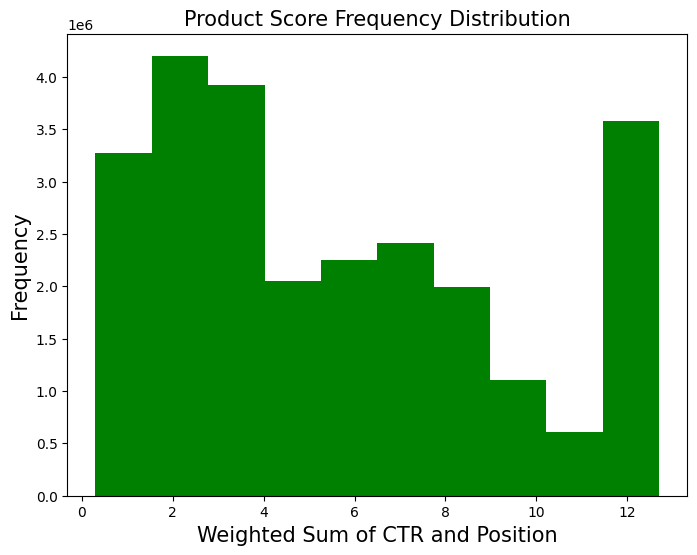

In [74]:
# Histogram of target variable
plt.figure(figsize=(8,6))
plt.xlabel("Weighted Sum of CTR and Position", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Product Score Frequency Distribution", fontsize=15)
plt.hist(numeric_df["target"], color= "green")
plt.show()

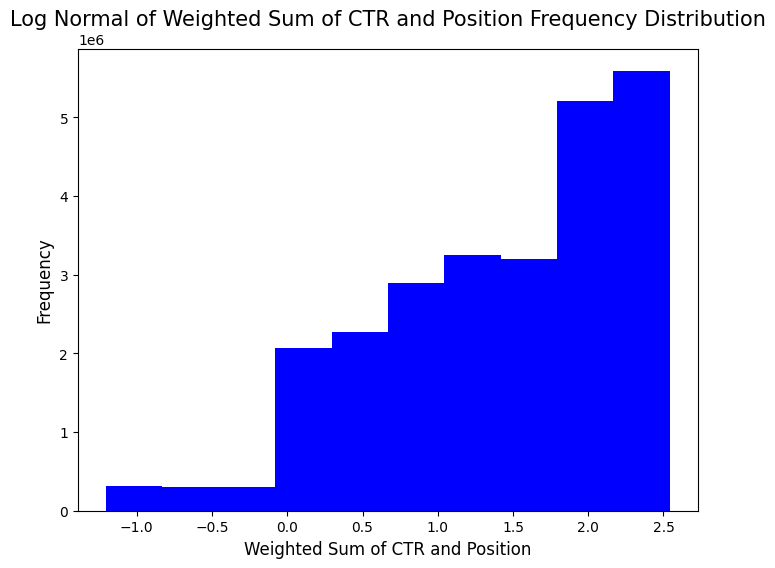

In [75]:
# Log normal histogram of target variable
target= np.log(numeric_df["target"])
plt.figure(figsize=(8,6))
plt.xlabel("Weighted Sum of CTR and Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Log Normal of Weighted Sum of CTR and Position Frequency Distribution", fontsize=15)
plt.hist(target, color= "blue")
plt.show()

In [76]:
# Get correlation of numeric variables
correlation= numeric_df.corr()
correlation["target"].sort_values(ascending=False)*100

target                            100.000000
position                           67.273492
product_age_normalized              7.603781
product_age_standardized            7.603781
normalized_lifetimeorder_count      4.833289
normalized_search_result_score      0.520539
price_standardized                 -0.054298
ctr_price_standardized             -1.110752
normalized_product_score           -5.268835
normalized_ctr                     -6.488029
official_store                     -6.766641
product_rating                     -7.582598
seller_badge                       -8.198586
normalized_a2crate                 -8.290078
normalized_cvr                     -8.290078
a2crclicks                        -12.632305
atoc_price_standardized           -12.905897
Name: target, dtype: float64

<Axes: title={'center': 'Correlation of Numeric Featuer with the target variable'}>

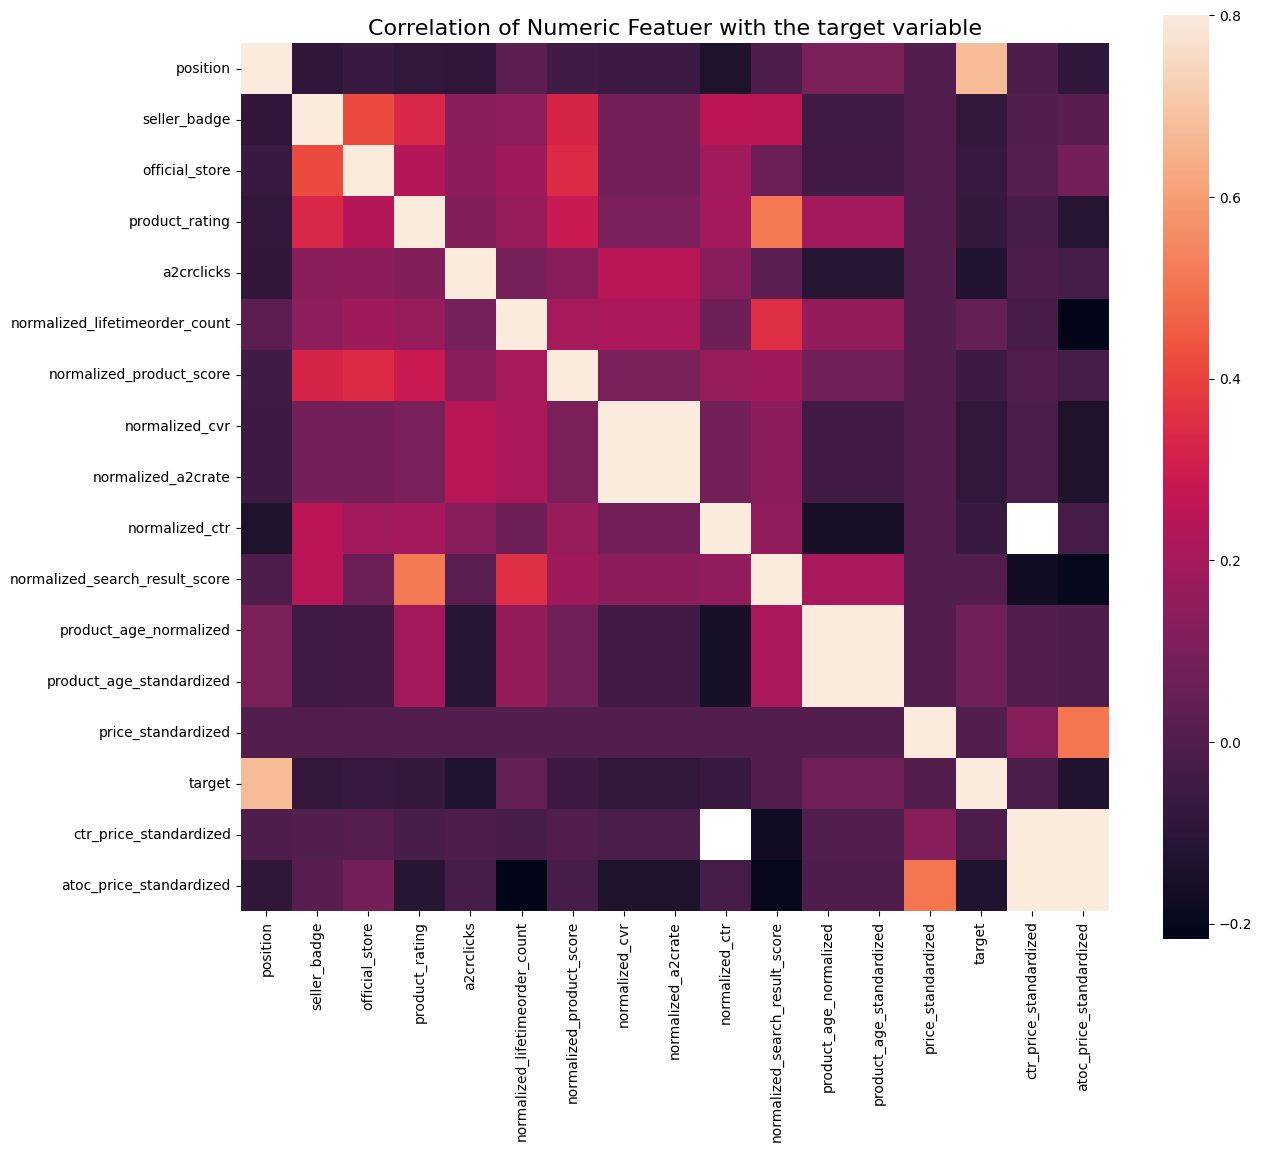

In [77]:
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Featuer with the target variable", y=1, size=16)
sns.heatmap(correlation, square= True, vmax=0.8)

Index(['target', 'position', 'product_age_normalized',
       'product_age_standardized', 'normalized_lifetimeorder_count'],
      dtype='object')


<Axes: >

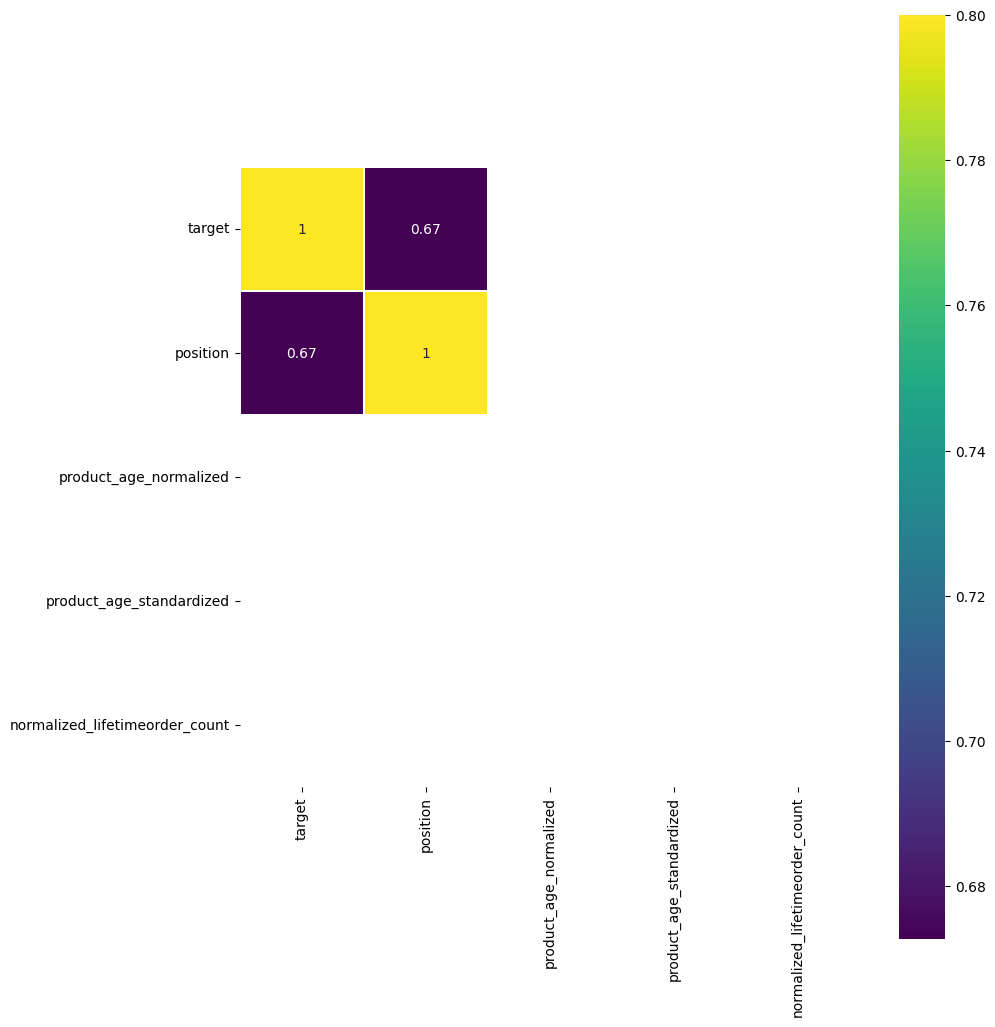

In [78]:
# Zoomed Heat Map

# Set the value of 'k' to determine the number of top features to consider
k = 5

# Get the column names of the 'k' features with the largest correlation values with the 'target' variable
cols = correlation.nlargest(k, 'target')['target'].index
print(cols)

# Compute the correlation matrix of the selected features
cm = np.corrcoef(numeric_df[cols].values.T)

# Create a figure and axes for the heatmap
f, ax = plt.subplots(figsize=(10, 12))

# Generate the heatmap using seaborn
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 10}, yticklabels=cols.values)


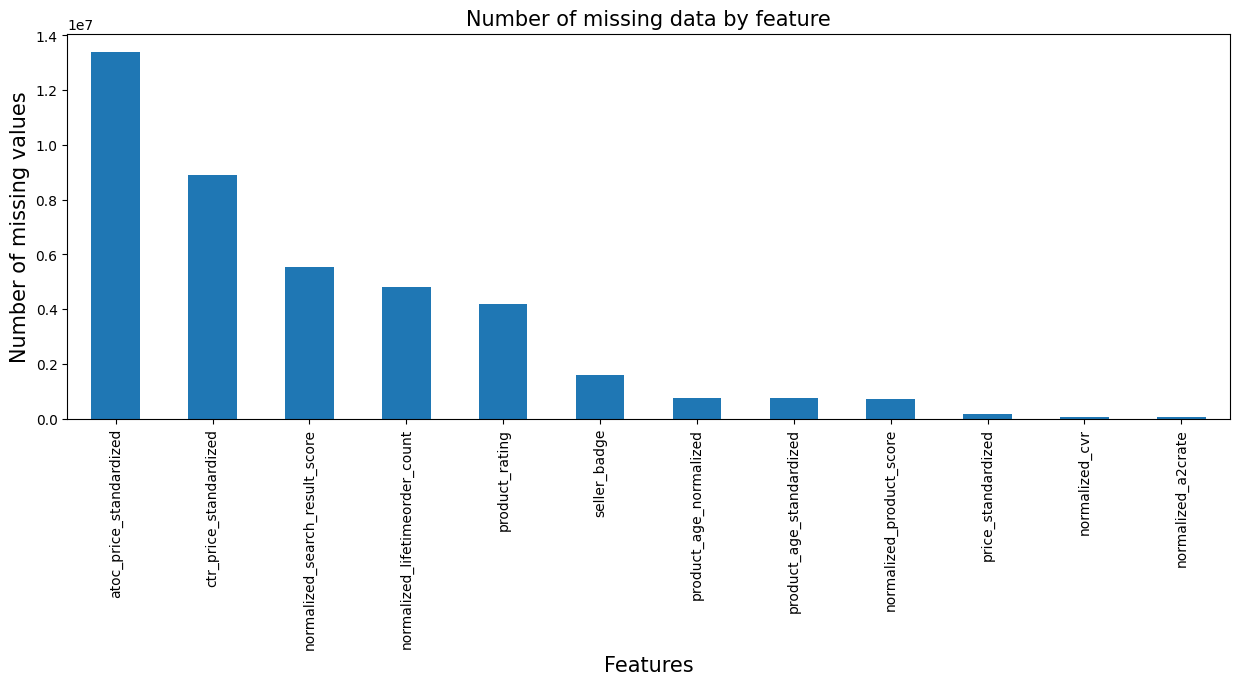

In [79]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= numeric_df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [80]:
# Get total and percent missing values
total = numeric_df.isnull().sum().sort_values(ascending=False)
percent = (numeric_df.isnull().sum()/numeric_df.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
atoc_price_standardized,13394328,52.731935
ctr_price_standardized,8899891,35.037851
normalized_search_result_score,5558459,21.883016
normalized_lifetimeorder_count,4825637,18.997980
product_rating,4207106,16.562894
seller_badge,1588111,6.252211
product_age_standardized,740559,2.915496
product_age_normalized,740559,2.915496
normalized_product_score,731341,2.879206
price_standardized,170567,0.671503


In [81]:
# Delete missing values variables from the dataset

# numeric_df.drop(["atoc_price", "a2crate"], axis=1,inplace=True)

In [82]:
#df['sales_velocity_components'][0]

In [83]:
numeric_df.describe()

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,target,ctr_price_standardized,atoc_price_standardized
count,2.540079e+07,2.381268e+07,2.540079e+07,2.119368e+07,2.540079e+07,2.057515e+07,2.466945e+07,2.534383e+07,2.534383e+07,2.540079e+07,1.984233e+07,2.466023e+07,2.466023e+07,2.523022e+07,2.540079e+07,1.650090e+07,1.200646e+07
mean,2.320359e+01,3.535509e+00,6.522437e-01,3.246553e+00,1.589399e+00,2.026981e-02,5.403005e-01,1.656170e-03,3.312340e-03,6.496215e-01,8.179751e-02,8.591446e-02,-3.821797e-17,1.658411e-19,5.627408e+00,6.376451e-18,6.249411e-19
std,3.447087e+01,8.528380e-01,4.762582e-01,2.327606e+00,3.916251e+00,5.522201e-02,1.041756e-01,8.270826e-03,1.654165e-02,4.770885e-01,6.173024e-02,9.237456e-02,1.000000e+00,1.000000e+00,3.759829e+00,1.000000e+00,1.000000e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.300662e-01,-8.422394e-04,3.000000e-01,-1.273294e-01,-1.062178e+00
25%,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.223077e-04,4.925360e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.801814e-02,1.878497e-02,-7.267097e-01,-8.127707e-04,2.400000e+00,-8.054487e-02,-6.520958e-01
50%,1.500000e+01,4.000000e+00,1.000000e+00,4.900000e+00,0.000000e+00,1.974135e-03,5.747404e-01,0.000000e+00,0.000000e+00,1.000000e+00,3.324051e-02,5.915268e-02,-2.897094e-01,-7.919397e-04,4.800000e+00,-5.285669e-02,-3.803153e-01
75%,2.600000e+01,4.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,1.450385e-02,6.195530e-01,2.635741e-04,5.271481e-04,1.000000e+00,1.495425e-01,1.314948e-01,4.934296e-01,-7.377373e-04,8.200000e+00,2.731299e-02,3.684086e-01
max,8.000000e+02,4.000000e+00,1.000000e+00,5.000000e+00,7.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.895425e+00,1.734474e+03,1.270000e+01,2.576530e+02,6.419990e+00


In [84]:
numeric_df.corr()

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,target,ctr_price_standardized,atoc_price_standardized
position,1.000000,-0.089287,-0.065579,-0.084193,-0.087743,0.028719,-0.046151,-0.056185,-0.056185,-0.134336,-0.010104,0.104516,0.104516,-0.000087,0.672735,-0.006860,-0.091835
seller_badge,-0.089287,1.000000,0.417959,0.333754,0.135664,0.145716,0.324843,0.087985,0.087985,0.249426,0.243931,-0.046790,-0.046790,-0.001204,-0.081986,-0.000952,0.018189
official_store,-0.065579,0.417959,1.000000,0.236607,0.138281,0.181067,0.339506,0.085000,0.085000,0.188915,0.062667,-0.039023,-0.039023,-0.001017,-0.067666,0.012181,0.088184
product_rating,-0.084193,0.333754,0.236607,1.000000,0.116820,0.169273,0.285980,0.097238,0.097238,0.192927,0.516091,0.198679,0.198679,-0.000651,-0.075826,-0.020267,-0.110231
a2crclicks,-0.087743,0.135664,0.138281,0.116820,1.000000,0.089832,0.130629,0.244048,0.244048,0.130221,0.023387,-0.110159,-0.110159,-0.000313,-0.126323,-0.009456,-0.026994
normalized_lifetimeorder_count,0.028719,0.145716,0.181067,0.169273,0.089832,1.000000,0.200507,0.212708,0.212708,0.065591,0.358002,0.162793,0.162793,-0.000194,0.048333,-0.023977,-0.217209
normalized_product_score,-0.046151,0.324843,0.339506,0.285980,0.130629,0.200507,1.000000,0.100935,0.100935,0.171404,0.186276,0.079528,0.079528,0.000673,-0.052688,-0.005513,-0.029641
normalized_cvr,-0.056185,0.087985,0.085000,0.097238,0.244048,0.212708,0.100935,1.000000,1.000000,0.081271,0.139980,-0.039904,-0.039904,-0.000160,-0.082901,-0.015944,-0.137699
normalized_a2crate,-0.056185,0.087985,0.085000,0.097238,0.244048,0.212708,0.100935,1.000000,1.000000,0.081271,0.139980,-0.039904,-0.039904,-0.000160,-0.082901,-0.015944,-0.137699
normalized_ctr,-0.134336,0.249426,0.188915,0.192927,0.130221,0.065591,0.171404,0.081271,0.081271,1.000000,0.155683,-0.150031,-0.150031,-0.001030,-0.064880,NaN,-0.032820


<Axes: >

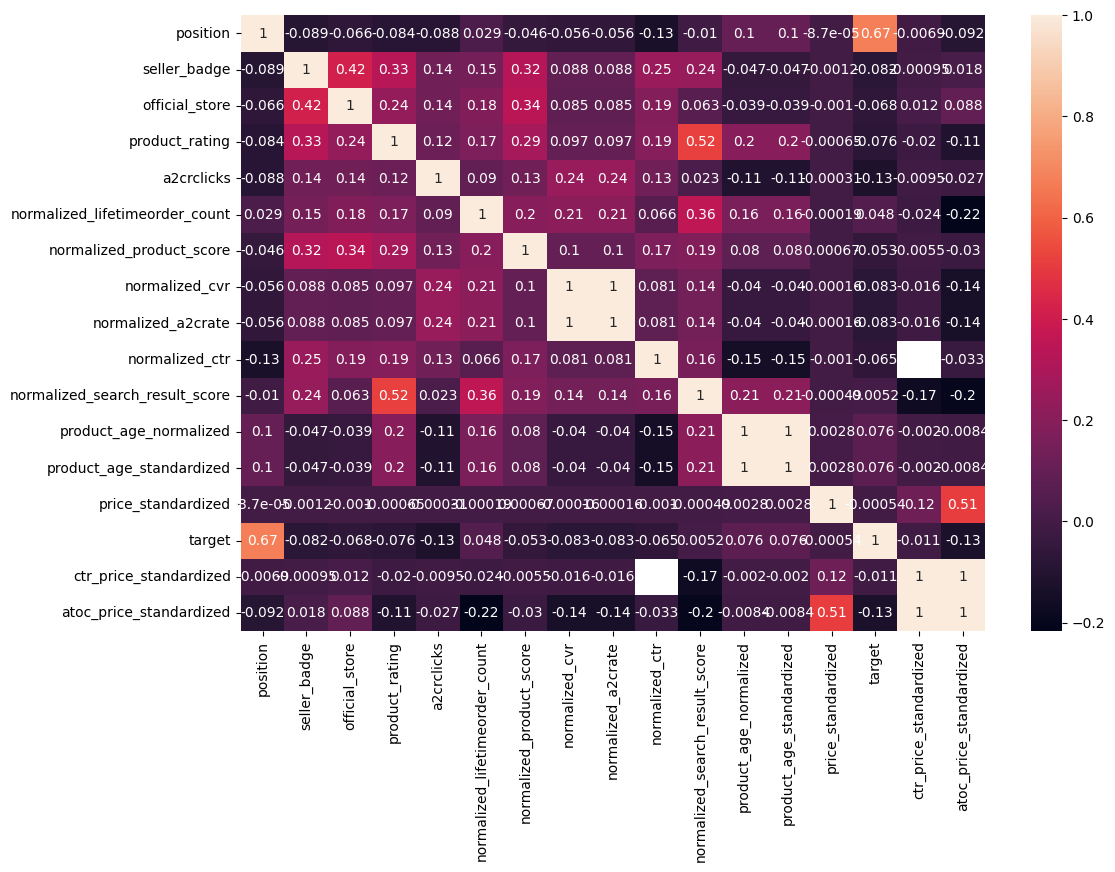

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True)

In [86]:
import statsmodels.api as sm

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows containing missing or infinite values
numeric_df_clean = numeric_df.replace([np.inf, -np.inf], np.nan).dropna()

X_new = sm.add_constant(numeric_df_clean)

# Calculate VIF for each variable
vif = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]

# Print VIF values
print(vif)

/Users/akhileshk/.pyenv/versions/3.10.3/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/akhileshk/.pyenv/versions/3.10.3/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[2.2265899401650575, 1.1274168869067547, 1.2885937456322274, 1.3485389790981022, 1.061902048699166, 1.5297109684182475, 1.2569893412474498, 151725000.38054207, 69009811.06525424, 0.0, 1.7285706094366398, inf, inf, 1.3767031969483754, 2.2701415554384687, 650.6896910300025, 651.1692512719486]


In [88]:
numeric_df_clean.head()

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,target,ctr_price_standardized,atoc_price_standardized
1,4,2.0,0,0.0,1,0.009750,0.639256,0.009724,0.019449,1.0,0.149535,0.059552,-0.285383,-0.000822,1.9,-0.098226,-0.783641
2,1,4.0,1,4.9,1,0.155231,0.607473,0.000000,0.000000,1.0,0.103827,0.225819,1.514539,-0.000807,1.0,-0.068066,-0.532136
5,26,4.0,1,4.9,1,0.035736,0.610493,0.000000,0.000000,1.0,0.058109,0.183853,1.060232,-0.000775,8.5,-0.024501,-0.118672
7,51,1.0,0,5.0,1,0.001813,0.221331,0.000000,0.000000,1.0,0.151373,0.077138,-0.095006,-0.000768,12.7,-0.016742,-0.024539
11,4,4.0,1,5.0,7,0.037428,0.586677,0.010152,0.020305,1.0,0.150160,0.058753,-0.294036,-0.000822,1.9,-0.097427,-0.789193


In [89]:
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [90]:
numeric_df_clean.head()

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,target,ctr_price_standardized,atoc_price_standardized
1,4,2.0,0,0.0,1,0.009750,0.639256,0.009724,0.019449,1.0,0.149535,0.059552,-0.285383,-0.000822,1.9,-0.098226,-0.783641
2,1,4.0,1,4.9,1,0.155231,0.607473,0.000000,0.000000,1.0,0.103827,0.225819,1.514539,-0.000807,1.0,-0.068066,-0.532136
5,26,4.0,1,4.9,1,0.035736,0.610493,0.000000,0.000000,1.0,0.058109,0.183853,1.060232,-0.000775,8.5,-0.024501,-0.118672
7,51,1.0,0,5.0,1,0.001813,0.221331,0.000000,0.000000,1.0,0.151373,0.077138,-0.095006,-0.000768,12.7,-0.016742,-0.024539
11,4,4.0,1,5.0,7,0.037428,0.586677,0.010152,0.020305,1.0,0.150160,0.058753,-0.294036,-0.000822,1.9,-0.097427,-0.789193


In [91]:
#TODO: Implemnt stratified splitting
def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1, target_variable=None):
    assert (train_split + test_split + val_split) == 1
    
    # Only allows for equal validation and test splits
    assert val_split == test_split 

    # Shuffle
    df_sample = df.sample(frac=1, random_state=12)

    # Specify seed to always have the same split distribution between runs
    # If target variable is provided, generate stratified sets
    if target_variable is not None:
      grouped_df = df_sample.groupby(target_variable)
      arr_list = [np.split(g, [int(train_split * len(g)), int((1 - val_split) * len(g))]) for i, g in grouped_df]

      train_ds = pd.concat([t[0] for t in arr_list])
      val_ds = pd.concat([t[1] for t in arr_list])
      test_ds = pd.concat([v[2] for v in arr_list])

    else:
      indices_or_sections = [int(train_split * len(df)), int((1 - val_split) * len(df))]
      train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, val_ds, test_ds

In [92]:
train_split = 0.8  # Percentage of data for training set
val_split = 0.1  # Percentage of data for validation set
test_split = 0.1  # Percentage of data for test set

# Call the function to split the dataset
train_ds, val_ds, test_ds = get_dataset_partitions_pd(numeric_df_clean, train_split, val_split, test_split, target_variable='target')

# Check the shape or any other necessary operations on the datasets
print("Train set shape:", train_ds.shape)
print("Validation set shape:", val_ds.shape)
print("Test set shape:", test_ds.shape)

Train set shape: (4850639, 17)
Validation set shape: (606330, 17)
Test set shape: (606348, 17)


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [95]:
# Training set
X_train = train_ds.drop('target', axis=1)  # Features for training set
y_train = train_ds['target']  # Target variable for training set


In [96]:
# Validation set
X_val = val_ds.drop('target', axis=1)  # Features for validation set
y_val = val_ds['target']  # Target variable for validation set


In [97]:
# Test set
X_test = test_ds.drop('target', axis=1)  # Features for test set
y_test = test_ds['target']  # Target variable for test set


In [98]:
# Create an instance of the linear regression model:
search_linear_model = LinearRegression()

In [99]:
# Fit the model to the training data:
search_linear_model.fit(X_train, y_train)

LinearRegression()

In [100]:
#Predict the target variable for the validation and test datasets:
y_val_pred = search_linear_model.predict(X_val)
y_test_pred = search_linear_model.predict(X_test)

In [101]:
#Evaluate the model's performance using metrics such as mean squared error (MSE) and coefficient of determination (R-squared):

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Validation Set MSE:", val_mse)
print("Validation Set R-squared:", val_r2)
print("Test Set MSE:", test_mse)
print("Test Set R-squared:", test_r2)


Validation Set MSE: 5.30204191745273
Validation Set R-squared: 0.5634978705787679
Test Set MSE: 5.352615850826805
Test Set R-squared: 0.5593346429949244


In [102]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)

[21:22:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [103]:
# Predict the model
pred = xgb_r.predict(X_val)

In [104]:
pred

array([ 0.9858761,  0.9858761,  0.9858761, ..., 12.355375 , 12.355375 ,
       12.355375 ], dtype=float32)

In [110]:
X_val

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,ctr_price_standardized,atoc_price_standardized
11780246,1,4.0,1,4.9,5,0.030901,0.688584,0.018634,0.037267,1.0,0.149846,0.067546,-0.198848,-0.000816,-0.087915,-0.695783
5137991,1,4.0,0,5.0,1,0.000846,0.568211,0.000208,0.000415,1.0,0.158252,0.134692,0.528044,-0.000679,0.130425,1.351260
7504355,1,2.0,0,5.0,8,0.000201,0.525412,0.000000,0.000000,1.0,0.028018,0.171063,0.921776,-0.000839,-0.122200,-1.014148
1330258,1,4.0,1,5.0,14,0.001007,0.578048,0.000000,0.000000,1.0,0.028018,0.012390,-0.795937,-0.000739,0.028628,0.384791
13623742,1,4.0,1,4.9,3,0.110229,0.627750,0.035990,0.071979,1.0,0.148450,0.113909,0.303053,-0.000824,-0.100778,-0.814778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343924,73,4.0,0,5.0,1,0.020829,0.552162,0.005076,0.010152,1.0,0.149546,0.046763,-0.423838,-0.000822,-0.097556,-0.787021
1871062,147,4.0,1,5.0,3,0.037428,0.586677,0.010152,0.020305,1.0,0.150160,0.058753,-0.294036,-0.000822,-0.098025,-0.783593
8356319,95,4.0,1,0.0,1,0.000483,0.465748,0.000000,0.000000,1.0,0.149378,0.034373,-0.557967,-0.000792,-0.055699,-0.363239
6329260,83,4.0,1,5.0,1,0.001652,0.551730,0.001019,0.002039,1.0,0.150533,0.081934,-0.043086,-0.000811,-0.082089,-0.624821


In [107]:
def make_prediction(product_attributes):
    trained_model = xgb_r

    # Prepare the input data
    input_data = pd.DataFrame(
        [product_attributes],
        columns=[
            "position","seller_badge","official_store","product_rating","a2crclicks","normalized_lifetimeorder_count","normalized_product_score","normalized_cvr","normalized_a2crate","normalized_ctr","normalized_search_result_score","product_age_normalized","product_age_standardized","price_standardized","ctr_price_standardized","atoc_price_standardized"
        ],
    )

    # Make the prediction
    prediction = trained_model.predict(input_data)

    return prediction

In [111]:
y_val

11780246     1.0
5137991      1.0
7504355      1.0
1330258      1.0
13623742     1.0
            ... 
16343924    12.7
1871062     12.7
8356319     12.7
6329260     12.7
8054799     12.7
Name: target, Length: 606330, dtype: float64

In [113]:
X_val

,position,seller_badge,official_store,product_rating,a2crclicks,normalized_lifetimeorder_count,normalized_product_score,normalized_cvr,normalized_a2crate,normalized_ctr,normalized_search_result_score,product_age_normalized,product_age_standardized,price_standardized,ctr_price_standardized,atoc_price_standardized
11780246,1,4.0,1,4.9,5,0.030901,0.688584,0.018634,0.037267,1.0,0.149846,0.067546,-0.198848,-0.000816,-0.087915,-0.695783
5137991,1,4.0,0,5.0,1,0.000846,0.568211,0.000208,0.000415,1.0,0.158252,0.134692,0.528044,-0.000679,0.130425,1.351260
7504355,1,2.0,0,5.0,8,0.000201,0.525412,0.000000,0.000000,1.0,0.028018,0.171063,0.921776,-0.000839,-0.122200,-1.014148
1330258,1,4.0,1,5.0,14,0.001007,0.578048,0.000000,0.000000,1.0,0.028018,0.012390,-0.795937,-0.000739,0.028628,0.384791
13623742,1,4.0,1,4.9,3,0.110229,0.627750,0.035990,0.071979,1.0,0.148450,0.113909,0.303053,-0.000824,-0.100778,-0.814778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16343924,73,4.0,0,5.0,1,0.020829,0.552162,0.005076,0.010152,1.0,0.149546,0.046763,-0.423838,-0.000822,-0.097556,-0.787021
1871062,147,4.0,1,5.0,3,0.037428,0.586677,0.010152,0.020305,1.0,0.150160,0.058753,-0.294036,-0.000822,-0.098025,-0.783593
8356319,95,4.0,1,0.0,1,0.000483,0.465748,0.000000,0.000000,1.0,0.149378,0.034373,-0.557967,-0.000792,-0.055699,-0.363239
6329260,83,4.0,1,5.0,1,0.001652,0.551730,0.001019,0.002039,1.0,0.150533,0.081934,-0.043086,-0.000811,-0.082089,-0.624821


In [116]:
def calculate_errors(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse, mse

def make_prediction(product_attributes):
    trained_model = xgb_r

    # Prepare the input data
    input_data = pd.DataFrame(
        [product_attributes],
        columns=[
            "position","seller_badge","official_store","product_rating","a2crclicks","normalized_lifetimeorder_count","normalized_product_score","normalized_cvr","normalized_a2crate","normalized_ctr","normalized_search_result_score","product_age_normalized","product_age_standardized","price_standardized","ctr_price_standardized","atoc_price_standardized"
        ],
    )

    # Make the prediction
    prediction = trained_model.predict(input_data)

    return prediction

# Example usage
product_attributes = [1,4.0,1,4.9,5,0.030901,0.688584,0.018634,0.037267,1.0,0.149846,0.067546,-0.198848,-0.000816,-0.087915,-0.695783]
prediction = make_prediction(product_attributes)
print(prediction)
# Assuming you have the true target value
true_value = 1.0

# Calculate RMSE and MSE
rmse, mse = calculate_errors([true_value], [prediction])

# Print the results
print("RMSE:", rmse)
print("MSE:", mse)

[0.9858761]
RMSE: 0.014123916625976562
MSE: 0.00019948502085753717


In [117]:

product_attributes = [73,4.0,0,5.0,1,0.020829,0.552162,0.005076,0.010152,1.0,0.149546,0.046763,-0.423838,-0.000822,-0.097556,-0.787021]
prediction = make_prediction(product_attributes)
print(prediction)

[12.355375]
